In [64]:
import pandas as pd
import numpy as np
import requests
import re
import json
import matplotlib.pyplot as plt

In [65]:
raw_data = pd.read_excel('raw_data_scraped.xlsx')

In [66]:
raw_data

,Job Title,Company Name,Location,Salary,Date,Industry,Descriptions,Seniority,Employment,Job Function,Link
0,Data Analyst,ASTRO,"Jakarta, Indonesia",NaN,2022-09-15,Biotechnology Research,Data Analyst,Associate,Full-time,Information Technology,https://id.linkedin.com/jobs/view/data-analyst...
1,Data Analyst,JULO,"Jakarta, Indonesia",NaN,2022-09-19,Financial Services,Data Analyst,Associate,Full-time,Information Technology and Analyst,https://id.linkedin.com/jobs/view/data-analyst...
2,Data Analyst,DELOS,"Jakarta, Indonesia",NaN,2022-09-16,Biotechnology Research,Data Analyst,Mid-Senior level,Full-time,Information Technology,https://id.linkedin.com/jobs/view/data-analyst...
3,Data Analyst,Migo,"Jakarta, Jakarta, Indonesia",NaN,2022-09-27,Software Development,Data Analyst,Entry level,Other,Information Technology,https://id.linkedin.com/jobs/view/data-analyst...
4,Data Analyst,Bibit.id,"South Jakarta City, Jakarta, Indonesia",NaN,2022-08-18,Financial Services,Data Analyst,Associate,Full-time,Analyst,https://id.linkedin.com/jobs/view/data-analyst...
...,...,...,...,...,...,...,...,...,...,...,...
974,Data Scientist,Perqara,"Jakarta, Jakarta, Indonesia","IDR7,000,000 - IDR10,000,000",2022-07-15,IT Services and IT Consulting,Data Scientist,Associate,Full-time,Information Technology,https://id.linkedin.com/jobs/view/data-scienti...
975,Backend Engineer,CrediBook (YC W22),"Jakarta, Jakarta, Indonesia",NaN,2022-09-15,Software Development,Backend Engineer,Entry level,Full-time,Engineering and Information Technology,https://id.linkedin.com/jobs/view/backend-engi...
976,Platform and Infrastructure Engineer - SDE1,Lummo,"Jakarta, Jakarta, Indonesia","IDR12,000,000 - IDR20,000,000",2022-07-13,"Technology, Information and Internet",Platform and Infrastructure Engineer - SDE1,Associate,Full-time,Engineering,https://id.linkedin.com/jobs/view/platform-and...
977,Machine Learning Engineer,Finku,"Jakarta, Jakarta, Indonesia",NaN,2022-10-06,Financial Services,Machine Learning Engineer,Entry level,Full-time,Engineering and Information Technology,https://id.linkedin.com/jobs/view/machine-lear...


In [67]:
raw_data1 = raw_data[raw_data['Job Title'].str.contains('Data Analyst|Data Scientist|Business Analyst|Data Engineer|Intelligence', regex = True, na =False)]

## Drop unnecessary column

In [68]:
raw_data1.drop(['Descriptions', 'Seniority','Job Function','Link'], axis = 1, inplace = True)

C:\Users\IRONMAM\AppData\Local\Temp\ipykernel_3956\698414369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data1.drop(['Descriptions', 'Seniority','Job Function','Link'], axis = 1, inplace = True)


In [69]:
raw_data1

,Job Title,Company Name,Location,Salary,Date,Industry,Employment
0,Data Analyst,ASTRO,"Jakarta, Indonesia",NaN,2022-09-15,Biotechnology Research,Full-time
1,Data Analyst,JULO,"Jakarta, Indonesia",NaN,2022-09-19,Financial Services,Full-time
2,Data Analyst,DELOS,"Jakarta, Indonesia",NaN,2022-09-16,Biotechnology Research,Full-time
3,Data Analyst,Migo,"Jakarta, Jakarta, Indonesia",NaN,2022-09-27,Software Development,Other
4,Data Analyst,Bibit.id,"South Jakarta City, Jakarta, Indonesia",NaN,2022-08-18,Financial Services,Full-time
...,...,...,...,...,...,...,...
926,Analyst / Senior Analyst – Business Intelligen...,Agoda,"Bali, Indonesia",NaN,2022-09-15,"Technology, Information and Internet",Full-time
954,"Expert, Data Scientist",Asia Pulp & Paper,"Tangerang, Banten, Indonesia",NaN,2022-09-09,"Manufacturing, Financial Services, and Paper a...",Full-time
955,Business Partnering – Front Office Business An...,Wilmar Consultancy Services,"Jakarta, Jakarta, Indonesia",NaN,2022-08-26,Software Development,Full-time
974,Data Scientist,Perqara,"Jakarta, Jakarta, Indonesia","IDR7,000,000 - IDR10,000,000",2022-07-15,IT Services and IT Consulting,Full-time


## Checking Data

In [70]:
raw_data1['Job Title'].unique()

array(['Data Analyst', 'Data Analyst (Fully Remote)', 'Data Analyst Lead',
       'Junior Data Engineer', 'Business & Data Analyst intern',
       'Senior Data Analyst', 'Data Analyst Reporting Specialist',
       'Business Data Analyst', 'Retail Data Analyst',
       'Data Analyst Operations', 'Data Analyst, Surabaya',
       'Business Intelligence (Data Analyst)', 'Marketing Data Analyst',
       'Data Analyst (Amaan Project)', 'Data Analyst KG Media',
       'Data Analyst (Full Time)', 'Data Analyst Consultant',
       'Data Analyst Digital Marketing',
       'Data Analyst - Corporate Data, Engineering and Technology, Sea Labs',
       'Data Analyst-User Trust',
       'Data Analyst - Universitas Multimedia Nusantara',
       'Associate Business Intelligence Analyst', 'Data Analyst Risk',
       'Business Intelligence Analyst',
       'Business Development - Data Analyst Staff', 'Sharia Data Analyst',
       'Reporting & Data Analyst (Operations Digital Banking)',
       'Junior Dat

In [71]:
raw_data1['Company Name'].unique()

array(['ASTRO', 'JULO', 'DELOS', 'Migo', 'Bibit.id', 'Mamikos',
       'PT Salam Pacific Indonesia Lines', 'VLink Inc', 'FIT HUB',
       'NoLimit Indonesia', 'SehatQ', 'NOICE', 'Reku (Rekeningku)',
       'Aruna', 'Gravel', 'Somethinc - BeautyHaul', 'AgriAku',
       'WeNetwork', 'Summit Institute of Development', 'BintanGO',
       'Blibli.com', 'PT Bank Sinarmas Tbk', 'INDOZONE',
       'Great Giant Foods', 'Thinkmatch', 'Paper.id',
       'PT Barrans Global Mandiri', 'Mediatropy Digital Agency',
       'Little Joy Indonesia', 'PT Berlian Sistem Informasi',
       'PT Global Urban Esensial', 'Moladin', 'Celerates',
       'PT Macra Teknologi Indonesia', 'Asia Pulp & Paper', 'JALA Tech',
       'Discover Financial Services', 'Asuransi Astra', 'FinAccel',
       'Grab', 'Tiara Hana', 'PT Kreatifitas Sinergisme Teknoindo (KST)',
       'Indocyber Global Teknologi, PT', 'Luxen', 'Valbury Asia Futures',
       'Power Commerce Asia', 'Youtap Indonesia', 'DKATALIS',
       'Clove Research 

In [72]:
raw_data1['Salary'].unique() #Ada Nan, NonIDR, dan salary yang tidak meyakinkan (IDR100)

array([nan, 'IDR100 - IDR200', 'IDR12,000,000 - IDR20,000,000',
       'IDR7,500,000 - IDR9,000,000', 'IDR1,000,000 - IDR1,500,000',
       'IDR3,500,000 - IDR6,000,000', 'IDR5,000,000 - IDR6,000,000',
       'IDR10,000,000 - IDR15,000,000', 'IDR5,500,000 - IDR7,200,000',
       'IDR8,000,000 - IDR10,000,000', 'IDR4,500,000 - IDR5,000,000',
       'IDR5,000,000 - IDR7,000,000', 'IDR6,000,000 - IDR10,000,000',
       'IDR5,250,000 - IDR6,000,000', 'IDR5,500,000 - IDR7,000,000',
       'IDR6,000,000 - IDR9,000,000', 'IDR1,500,000 - IDR1,500,100',
       'IDR20,000,000 - IDR30,000,000', 'IDR5,750,000 - IDR10,250,000',
       'IDR100 - IDR25,000,000', 'IDR5,500,000 - IDR6,500,000',
       'IDR12,000,000 - IDR18,000,000', 'IDR1,000,000 - IDR1,100,000',
       'IDR5,000,000 - IDR8,000,000', 'IDR6,000,000 - IDR12,000,000',
       'IDR1,200,000 - IDR1,500,000', 'IDR2,000,000 - IDR2,000,000',
       'IDR8,000,000 - IDR20,000,000', 'IDR7,000,000 - IDR9,000,000',
       'IDR500,000 - IDR1,000,000

In [73]:
raw_data1['Industry'].unique()

array(['Biotechnology Research', 'Financial Services',
       'Software Development', 'IT Services and IT Consulting',
       'IT Services and IT Consulting, Transportation, Logistics, Supply Chain and Storage, and Truck Transportation',
       'Wellness and Fitness Services', 'Online Audio and Video Media',
       'Entertainment Providers', 'Fisheries', 'Retail', 'Farming',
       'Staffing and Recruiting', 'Non-profit Organizations',
       'Technology, Information and Internet', 'Banking',
       'Food and Beverage Services', 'Food Production', nan,
       'Manufacturing', 'Motor Vehicle Manufacturing',
       'Paper and Forest Product Manufacturing',
       'Banking, Financial Services, and Hospitality', 'Insurance',
       'Travel Arrangements', 'Media Production',
       'Advertising Services and Public Relations and Communications Services',
       'Computer and Network Security and Technology, Information and Internet',
       'Freight and Package Transportation', 'Fundraising'

In [74]:
raw_data1['Location'].unique()

array(['Jakarta, Indonesia', 'Jakarta, Jakarta, Indonesia',
       'South Jakarta City, Jakarta, Indonesia',
       'Surabaya, East Java, Indonesia', 'Bandung, Banten, Indonesia',
       'Jakarta Metropolitan Area',
       'Mataram, West Nusa Tenggara, Indonesia',
       'Tangerang, Banten, Indonesia', 'Indonesia',
       'South Tangerang City, Banten, Indonesia',
       'Sleman, Yogyakarta, Indonesia',
       'Yogyakarta, Yogyakarta, Indonesia', 'Us, West Papua, Indonesia',
       'Surabaya, West Java, Indonesia', 'Bogor, West Java, Indonesia',
       'West Jakarta, Jakarta, Indonesia',
       'Bantul, Yogyakarta, Indonesia', 'Bandung, East Java, Indonesia',
       'Central Jakarta, Jakarta, Indonesia',
       'Semarang, Central Java, Indonesia',
       'Malang, East Java, Indonesia', 'Bekasi, West Java, Indonesia',
       'Yogyakarta, Indonesia', 'Tangerang Selatan, Banten, Indonesia',
       'Pontianak, West Kalimantan, Indonesia',
       'Yosowilangun, East Java, Indonesia',
      

In [75]:
raw_data1['Date'].unique()

array(['2022-09-15', '2022-09-19', '2022-09-16', '2022-09-27',
       '2022-08-18', '2022-09-13', '2022-09-21', '2022-08-15',
       '2022-09-06', '2022-09-28', '2022-10-06', '2022-09-12',
       '2022-06-22', '2022-10-03', '2022-08-05', '2022-09-05',
       '2022-10-05', '2022-09-25', '2022-09-01', '2022-05-09',
       '2022-07-24', '2022-08-21', '2022-09-04', '2022-09-07',
       '2022-08-24', '2022-09-11', '2022-09-14', '2022-09-30',
       '2022-09-29', '2022-09-23', '2022-10-04', '2022-08-29',
       '2022-08-16', '2022-09-08', '2022-10-07', '2022-07-11',
       '2022-08-10', '2022-09-18', '2022-09-22', '2022-10-02',
       '2022-06-27', '2022-09-26', '2022-07-07', '2022-08-22',
       '2022-08-26', '2022-08-19', '2022-08-25', '2022-08-14',
       '2022-08-08', '2022-09-09', '2022-09-20', '2022-08-09',
       '2022-07-29', '2022-07-27', '2022-09-24', '2022-08-31',
       '2022-07-30', '2022-08-23', '2022-09-02', '2022-09-17',
       '2022-08-27', '2022-08-12', '2022-07-21', '2022-

In [76]:
raw_data1['Employment'].unique()

array(['Full-time', 'Other', nan, 'Internship', 'Contract',
       '\n          Full-time\n        ', 'Part-time'], dtype=object)

####
Summary :
- Industry : nan, empty spaces, kategori industri terlalu banyak butuh di simplified
- Salary : nan, non IDR (Butuh dikonversi)
- Location : Pengelompokan lokasi berdasarkan nama city yang tersedia di tableau
- Employment : Nan, Empty Spaces

## Cleaning Data From Empty Spaces

In [77]:
raw_data1['Industry'] = raw_data1['Industry'].str.replace('\n','')
raw_data1

C:\Users\IRONMAM\AppData\Local\Temp\ipykernel_3956\122748551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data1['Industry'] = raw_data1['Industry'].str.replace('\n','')


,Job Title,Company Name,Location,Salary,Date,Industry,Employment
0,Data Analyst,ASTRO,"Jakarta, Indonesia",NaN,2022-09-15,Biotechnology Research,Full-time
1,Data Analyst,JULO,"Jakarta, Indonesia",NaN,2022-09-19,Financial Services,Full-time
2,Data Analyst,DELOS,"Jakarta, Indonesia",NaN,2022-09-16,Biotechnology Research,Full-time
3,Data Analyst,Migo,"Jakarta, Jakarta, Indonesia",NaN,2022-09-27,Software Development,Other
4,Data Analyst,Bibit.id,"South Jakarta City, Jakarta, Indonesia",NaN,2022-08-18,Financial Services,Full-time
...,...,...,...,...,...,...,...
926,Analyst / Senior Analyst – Business Intelligen...,Agoda,"Bali, Indonesia",NaN,2022-09-15,"Technology, Information and Internet",Full-time
954,"Expert, Data Scientist",Asia Pulp & Paper,"Tangerang, Banten, Indonesia",NaN,2022-09-09,"Manufacturing, Financial Services, and Paper a...",Full-time
955,Business Partnering – Front Office Business An...,Wilmar Consultancy Services,"Jakarta, Jakarta, Indonesia",NaN,2022-08-26,Software Development,Full-time
974,Data Scientist,Perqara,"Jakarta, Jakarta, Indonesia","IDR7,000,000 - IDR10,000,000",2022-07-15,IT Services and IT Consulting,Full-time


In [78]:
data_industry = raw_data1.sort_values('Industry')

In [79]:
data_industry['Industry'] = data_industry['Industry'].str.strip()

In [80]:
data_industry['Industry'] = data_industry['Industry'].str.replace('\t','',regex = True)

In [81]:
data_industry.sort_values('Industry', inplace = True)

In [82]:
data_industry = data_industry['Industry']
data_industry.unique()

array(['Advertising Services',
       'Advertising Services and Public Relations and Communications Services',
       'Banking', 'Banking and Financial Services',
       'Banking, Financial Services, and Hospitality',
       'Banking, Insurance, and Business Consulting and Services',
       'Biotechnology Research', 'Business Consulting and Services',
       'Computer Hardware Manufacturing',
       'Computer Hardware Manufacturing, Software Development, and Computer Networking Products',
       'Computer and Network Security',
       'Computer and Network Security and Technology, Information and Internet',
       'Consumer Services',
       'Design Services, Manufacturing, and Entertainment Providers',
       'Education Administration Programs', 'Education Management',
       'Entertainment Providers', 'Environmental Services', 'Farming',
       'Financial Services', 'Fisheries', 'Food Production',
       'Food and Beverage Manufacturing', 'Food and Beverage Services',
       'Food an

In [83]:
Industry_New = pd.read_excel('Industry.xlsx', names = ['Industry'])
Industry_New

,Industry
0,Banking
1,Business Consulting and Services
2,Computer|Computer Hardware
3,Consumer Services
4,Education|Training and Coaching
5,Entertaiment|Media
6,Environmental Services
7,Farming|Fisheries
8,Financial Services
9,Food and Beverage


In [84]:
count = []

In [85]:
for row in Industry_New['Industry']:
    new_industry = raw_data1['Industry']
    count0 = raw_data1['Industry'].str.count(row)
    count.append(count0.sum())
count

[13.0,
 9.0,
 5.0,
 2.0,
 6.0,
 7.0,
 1.0,
 5.0,
 46.0,
 12.0,
 5.0,
 12.0,
 1.0,
 8.0,
 109.0,
 25.0,
 2.0,
 0.0,
 1.0,
 1.0,
 1.0,
 8.0,
 9.0,
 51.0,
 42.0,
 5.0,
 27.0,
 8.0,
 5.0]

In [86]:
Vacancy_by_Industry = pd.concat([Industry_New, pd.DataFrame(count)], axis = 1)
Vacancy_by_Industry

,Industry,0
0,Banking,13.0
1,Business Consulting and Services,9.0
2,Computer|Computer Hardware,5.0
3,Consumer Services,2.0
4,Education|Training and Coaching,6.0
5,Entertaiment|Media,7.0
6,Environmental Services,1.0
7,Farming|Fisheries,5.0
8,Financial Services,46.0
9,Food and Beverage,12.0


In [87]:
Vacancy_by_Industry.columns = ['Industry Category', 'Vacancy Count']

In [88]:
Vacancy_by_Industry['Vacancy Count'].loc[Vacancy_by_Industry['Industry Category'] == 'Not listed'] = data_industry.isna().sum()

C:\Users\IRONMAM\AppData\Local\Temp\ipykernel_3956\34071504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vacancy_by_Industry['Vacancy Count'].loc[Vacancy_by_Industry['Industry Category'] == 'Not listed'] = data_industry.isna().sum()


In [89]:
Vacancy_by_Industry.sort_values('Vacancy Count', ascending = False)

,Industry Category,Vacancy Count
14,IT Services and IT Consulting,109.0
23,Software Development,51.0
17,Not listed,50.0
8,Financial Services,46.0
24,"Technology, Information and Internet",42.0
26,Transportation|Travel|Logistics,27.0
15,Manufacturing,25.0
0,Banking,13.0
11,Human Resources|Staffing and Recruiting,12.0
9,Food and Beverage,12.0


### Salary Column

In [90]:
base_url = "http://api.exchangeratesapi.io/v1/latest?access_key=957d35af507526e6992ac823decaa7ce&format=1"
response = requests.get(base_url)
rate = response.json()
rate

{'success': True,
 'timestamp': 1667923143,
 'base': 'EUR',
 'date': '2022-11-08',
 'rates': {'AED': 3.697312,
  'AFN': 88.583593,
  'ALL': 117.629263,
  'AMD': 398.83645,
  'ANG': 1.813917,
  'AOA': 490.564571,
  'ARS': 160.774805,
  'AUD': 1.541297,
  'AWG': 1.814448,
  'AZN': 1.710479,
  'BAM': 1.968834,
  'BBD': 2.032163,
  'BDT': 102.038277,
  'BGN': 1.963408,
  'BHD': 0.379452,
  'BIF': 2064.59536,
  'BMD': 1.006629,
  'BND': 1.411853,
  'BOB': 6.954874,
  'BRL': 5.181017,
  'BSD': 1.006458,
  'BTC': 5.1782369e-05,
  'BTN': 82.089018,
  'BWP': 13.331014,
  'BYN': 2.54199,
  'BYR': 19729.921533,
  'BZD': 2.02872,
  'CAD': 1.351218,
  'CDF': 2057.548939,
  'CHF': 0.991398,
  'CLF': 0.032813,
  'CLP': 905.211004,
  'CNY': 7.297349,
  'COP': 5027.506128,
  'CRC': 622.81983,
  'CUC': 1.006629,
  'CUP': 26.675659,
  'CVE': 110.678747,
  'CZK': 24.284918,
  'DJF': 179.175209,
  'DKK': 7.438674,
  'DOP': 54.710601,
  'DZD': 141.137038,
  'EGP': 24.505563,
  'ERN': 15.09943,
  'ETB': 53.7

In [91]:
MYRtoEUR = 1/rate['rates']['MYR']
EURtoIDR = rate['rates']['IDR']
MYRtoIDR = MYRtoEUR * EURtoIDR

In [92]:
MYRtoIDR

3302.4375391419867

In [93]:
# raw_data1.fillna('Not Displayed', inplace = True)

In [94]:
# raw_data1[raw_data1['Salary'].str.startswith('MYR')].index

In [95]:
# raw_data1['Salary'][raw_data1[raw_data1['Salary'].str.startswith('MYR')].index]

In [96]:
salary = raw_data1['Salary'].str.split('-',expand =True)
salary

,0,1
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
926,NaN,NaN
954,NaN,NaN
955,NaN,NaN
974,"IDR7,000,000","IDR10,000,000"


In [97]:
salary.fillna('Not Displayed',inplace = True)

In [98]:
salary_MYR_index = salary[salary[0].str.startswith('MYR')].index

In [99]:
salary[~salary[0].str.contains('Not Displayed')].replace('[^0-9\.-]','',regex=True)

,0,1
11,100,200
18,100,200
19,12000000,20000000
24,7500000,9000000
29,1000000,1500000
...,...,...
787,9000000,12000000
837,5000000,8000000
861,10000000,17000000
974,7000000,10000000


In [100]:
salary.loc[salary[~salary[0].str.contains('Not Displayed')].replace('[^0-9\.-]','',regex=True).index] = salary[~salary[0].str.contains('Not Displayed')].replace('[^0-9\.-]','',regex=True)
salary

,0,1
0,Not Displayed,Not Displayed
1,Not Displayed,Not Displayed
2,Not Displayed,Not Displayed
3,Not Displayed,Not Displayed
4,Not Displayed,Not Displayed
...,...,...
926,Not Displayed,Not Displayed
954,Not Displayed,Not Displayed
955,Not Displayed,Not Displayed
974,7000000,10000000


In [101]:
salary.loc[salary_MYR_index] = salary.loc[salary_MYR_index].astype(int) * MYRtoIDR

In [102]:
salary.loc[salary_MYR_index]

,0,1
376,16512187.69571,33024375.39142


In [103]:
raw_data1['Initial Salary'] = salary[0]
raw_data1['Maximum Salary'] = salary[1]

C:\Users\IRONMAM\AppData\Local\Temp\ipykernel_3956\1974919257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data1['Initial Salary'] = salary[0]
C:\Users\IRONMAM\AppData\Local\Temp\ipykernel_3956\1974919257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data1['Maximum Salary'] = salary[1]


In [104]:
raw_data1.drop(['Salary'], axis = 1, inplace = True)
raw_data1

C:\Users\IRONMAM\AppData\Local\Temp\ipykernel_3956\2695482933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data1.drop(['Salary'], axis = 1, inplace = True)


,Job Title,Company Name,Location,Date,Industry,Employment,Initial Salary,Maximum Salary
0,Data Analyst,ASTRO,"Jakarta, Indonesia",2022-09-15,Biotechnology Research,Full-time,Not Displayed,Not Displayed
1,Data Analyst,JULO,"Jakarta, Indonesia",2022-09-19,Financial Services,Full-time,Not Displayed,Not Displayed
2,Data Analyst,DELOS,"Jakarta, Indonesia",2022-09-16,Biotechnology Research,Full-time,Not Displayed,Not Displayed
3,Data Analyst,Migo,"Jakarta, Jakarta, Indonesia",2022-09-27,Software Development,Other,Not Displayed,Not Displayed
4,Data Analyst,Bibit.id,"South Jakarta City, Jakarta, Indonesia",2022-08-18,Financial Services,Full-time,Not Displayed,Not Displayed
...,...,...,...,...,...,...,...,...
926,Analyst / Senior Analyst – Business Intelligen...,Agoda,"Bali, Indonesia",2022-09-15,"Technology, Information and Internet",Full-time,Not Displayed,Not Displayed
954,"Expert, Data Scientist",Asia Pulp & Paper,"Tangerang, Banten, Indonesia",2022-09-09,"Manufacturing, Financial Services, and Paper a...",Full-time,Not Displayed,Not Displayed
955,Business Partnering – Front Office Business An...,Wilmar Consultancy Services,"Jakarta, Jakarta, Indonesia",2022-08-26,Software Development,Full-time,Not Displayed,Not Displayed
974,Data Scientist,Perqara,"Jakarta, Jakarta, Indonesia",2022-07-15,IT Services and IT Consulting,Full-time,7000000,10000000


## Employment

In [105]:
raw_data1['Employment'] = raw_data1['Employment'].str.replace('\s', '', regex = True)
raw_data1['Employment'].unique()

C:\Users\IRONMAM\AppData\Local\Temp\ipykernel_3956\749360796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data1['Employment'] = raw_data1['Employment'].str.replace('\s', '', regex = True)


array(['Full-time', 'Other', nan, 'Internship', 'Contract', 'Part-time'],
      dtype=object)

In [106]:
raw_data1['Employment'].fillna('Not Displayed', inplace = True)

C:\Users\IRONMAM\AppData\Local\Temp\ipykernel_3956\939951397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data1['Employment'].fillna('Not Displayed', inplace = True)


In [107]:
raw_data1['Employment'].unique()

array(['Full-time', 'Other', 'Not Displayed', 'Internship', 'Contract',
       'Part-time'], dtype=object)

# Location

In [108]:
new_Location = raw_data1['Location'].str.split(',', n = 1, expand = True)
new_Location

,0,1
0,Jakarta,Indonesia
1,Jakarta,Indonesia
2,Jakarta,Indonesia
3,Jakarta,"Jakarta, Indonesia"
4,South Jakarta City,"Jakarta, Indonesia"
...,...,...
926,Bali,Indonesia
954,Tangerang,"Banten, Indonesia"
955,Jakarta,"Jakarta, Indonesia"
974,Jakarta,"Jakarta, Indonesia"


In [118]:
new_Location[0].unique()
- Us(Kabupaten) change to Fakfak
- South Jakarta City, west Jakarta, Central Jakarta, Jakarta Metropolitan Area to Jakarta
- Bandung (Jawa Timur) to Tulungagung
- Yosowilangun to Lumajang
- Bali to Badung ()

array(['Jakarta', 'South Jakarta City', 'Surabaya', 'Bandung',
       'Jakarta Metropolitan Area', 'Mataram', 'Tangerang', 'Indonesia',
       'South Tangerang City', 'Sleman', 'Yogyakarta', 'Us', 'Bogor',
       'West Jakarta', 'Bantul', 'Central Jakarta', 'Semarang', 'Malang',
       'Bekasi', 'Tangerang Selatan', 'Pontianak', 'Yosowilangun', 'Bali',
       'Jakarta Selatan'], dtype=object)

In [175]:
new_Location[1].fillna('Not Displayed',inplace = True)
# Bandung, East Java to Tulungagung
# Bandung, Banten to Soreang

In [196]:
new_Location[0][new_Location[0].str.contains('Bali')] = 'Badung'

In [197]:
new_Location[0][new_Location[0].str.contains('Bandung')][new_Location[1].str.contains('East Java')] = 'Tulungagung'
new_Location[0][new_Location[0].str.contains('Bandung')][new_Location[1].str.contains('Banten')] = 'Serang'
new_Location[0][new_Location[0].str.contains('Us')] = 'Fakfak'
new_Location[0][new_Location[0].str.contains('Jakarta')] = 'Jakarta'
new_Location[0][new_Location[0].str.contains('Tangerang')] = 'Tangerang'
new_Location[0][new_Location[0].str.contains('Yosowilangun')] = 'Lumajang'

In [189]:
new_Location[1].unique()

array([' Indonesia', ' Jakarta, Indonesia', ' East Java, Indonesia',
       ' Banten, Indonesia', 'Not Displayed',
       ' West Nusa Tenggara, Indonesia', ' Yogyakarta, Indonesia',
       ' West Papua, Indonesia', ' West Java, Indonesia',
       ' Central Java, Indonesia', ' West Kalimantan, Indonesia'],
      dtype=object)

In [198]:
raw_data1['Location'] = new_Location[0]

C:\Users\IRONMAM\AppData\Local\Temp\ipykernel_3956\3517362734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data1['Location'] = new_Location[0]


In [147]:
raw_data1

,Job Title,Company Name,Location,Date,Industry,Employment,Initial Salary,Maximum Salary
0,Data Analyst,ASTRO,Jakarta,2022-09-15,Biotechnology Research,Full-time,Not Displayed,Not Displayed
1,Data Analyst,JULO,Jakarta,2022-09-19,Financial Services,Full-time,Not Displayed,Not Displayed
2,Data Analyst,DELOS,Jakarta,2022-09-16,Biotechnology Research,Full-time,Not Displayed,Not Displayed
3,Data Analyst,Migo,Jakarta,2022-09-27,Software Development,Other,Not Displayed,Not Displayed
4,Data Analyst,Bibit.id,Jakarta,2022-08-18,Financial Services,Full-time,Not Displayed,Not Displayed
...,...,...,...,...,...,...,...,...
926,Analyst / Senior Analyst – Business Intelligen...,Agoda,Bali,2022-09-15,"Technology, Information and Internet",Full-time,Not Displayed,Not Displayed
954,"Expert, Data Scientist",Asia Pulp & Paper,Tangerang,2022-09-09,"Manufacturing, Financial Services, and Paper a...",Full-time,Not Displayed,Not Displayed
955,Business Partnering – Front Office Business An...,Wilmar Consultancy Services,Jakarta,2022-08-26,Software Development,Full-time,Not Displayed,Not Displayed
974,Data Scientist,Perqara,Jakarta,2022-07-15,IT Services and IT Consulting,Full-time,7000000,10000000


## Vacancy by Job Title

In [148]:
job_list = pd.DataFrame(['Data Analyst', 'Data Scientist', 'Business Analyst', 'Data Engineer', 'Intelligence'])
jt_count = []

In [149]:
for row in job_list[0]:
    count0 = raw_data1['Job Title'].str.count(row)
    jt_count.append(count0.sum())
jt_count

[171, 20, 47, 122, 76]

In [150]:
Vacancy_by_JobTitle = pd.concat([job_list, pd.DataFrame(jt_count)], axis = 1)
Vacancy_by_JobTitle.columns = ['Job Title', 'Vacancy Count']
Vacancy_by_JobTitle

,Job Title,Vacancy Count
0,Data Analyst,171
1,Data Scientist,20
2,Business Analyst,47
3,Data Engineer,122
4,Intelligence,76


In [200]:
data_cleaned[data_cleaned['Location'].str.contains('Bali')]

,Job Title,Company Name,Location,Date,Industry,Employment,Initial Salary,Maximum Salary


In [199]:
data_cleaned = raw_data1.copy()
data_cleaned

,Job Title,Company Name,Location,Date,Industry,Employment,Initial Salary,Maximum Salary
0,Data Analyst,ASTRO,Jakarta,2022-09-15,Biotechnology Research,Full-time,Not Displayed,Not Displayed
1,Data Analyst,JULO,Jakarta,2022-09-19,Financial Services,Full-time,Not Displayed,Not Displayed
2,Data Analyst,DELOS,Jakarta,2022-09-16,Biotechnology Research,Full-time,Not Displayed,Not Displayed
3,Data Analyst,Migo,Jakarta,2022-09-27,Software Development,Other,Not Displayed,Not Displayed
4,Data Analyst,Bibit.id,Jakarta,2022-08-18,Financial Services,Full-time,Not Displayed,Not Displayed
...,...,...,...,...,...,...,...,...
926,Analyst / Senior Analyst – Business Intelligen...,Agoda,Badung,2022-09-15,"Technology, Information and Internet",Full-time,Not Displayed,Not Displayed
954,"Expert, Data Scientist",Asia Pulp & Paper,Tangerang,2022-09-09,"Manufacturing, Financial Services, and Paper a...",Full-time,Not Displayed,Not Displayed
955,Business Partnering – Front Office Business An...,Wilmar Consultancy Services,Jakarta,2022-08-26,Software Development,Full-time,Not Displayed,Not Displayed
974,Data Scientist,Perqara,Jakarta,2022-07-15,IT Services and IT Consulting,Full-time,7000000,10000000


## Export Cleaned Data To Excel

In [201]:
with pd.ExcelWriter('Data_Related_Profession_Vacancy.xlsx') as writer :
    data_cleaned.to_excel(writer, sheet_name = 'main_sheet', index = False)
    Vacancy_by_Industry.to_excel(writer, sheet_name='Vacancy_by_Industry', index = False)
    Vacancy_by_JobTitle.to_excel(writer, sheet_name='Vacancy_by_Job_Title', index = False)

## Visualization Using Matplotlib
I'd prefer using tableau for complete and more professional looking Dashboard Visualization

In [153]:
Vacancy_by_Industry = Vacancy_by_Industry.sort_values('Vacancy Count', ascending=True)

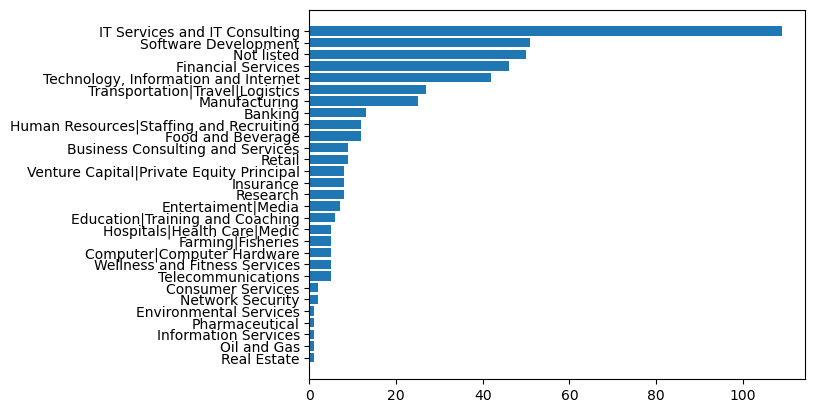

In [154]:
plt.barh(Vacancy_by_Industry['Industry Category'],Vacancy_by_Industry['Vacancy Count'])
plt.show()

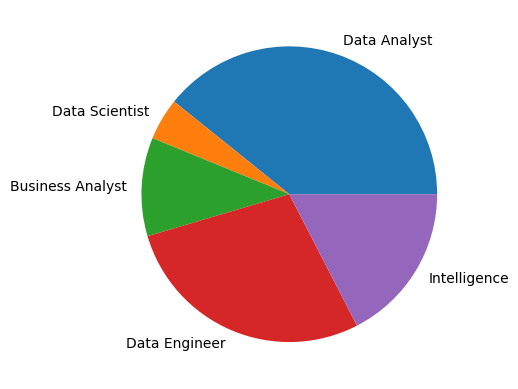

In [155]:
plt.pie(Vacancy_by_JobTitle['Vacancy Count'], labels=Vacancy_by_JobTitle['Job Title'])
plt.show()

## Checking & Validasi Data

In [156]:
len(data_cleaned['Job Title'])

431

In [157]:
Vacancy_by_Industry['Vacancy Count'].sum()

476.0

In [158]:
Vacancy_by_JobTitle['Vacancy Count'].sum()

436